In [1]:
#libraries

!pip install pydrive
!pip install GoogleCredential
!pip install auth
!pip install -q keras
!pip install -q IPython
!pip install -q matplotlib
!pip install -q numpy
!pip install -q pandas
!pip install -q plotly
!pip install -q tensorflow
!pip install -q seaborn
!pip install -q scikit-learn
!pip install tqdm
!pip install -q os-sys
!pip install -q librosa
!pip install -q resampy

ERROR: Could not find a version that satisfies the requirement GoogleCredential (from versions: none)
ERROR: No matching distribution found for GoogleCredential
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.2/363.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error

In [2]:
import os
import random
import sys
import time
import pandas as pd
import numpy as np
np.complex = complex
import librosa
from scipy import signal
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from tqdm import tqdm
from google.colab import drive
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
model = load_model("/content/drive/MyDrive/Colab Notebooks/Data-preparation2/test3/CNN-21-12-24.keras")
combined_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-preparation2/test3/combined_df.csv")
X = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-preparation2/test3/X.csv")
y = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data-preparation2/test3/Y.csv")


In [6]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['depression'], axis=1)
y = combined_df.depression
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [7]:
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


Class distribution in y_train:
depression
low     0.334437
high    0.334437
med     0.331126
Name: proportion, dtype: float64

Class distribution in y_test:
depression
med     0.342105
low     0.328947
high    0.328947
Name: proportion, dtype: float64


In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

import pickle
pickle.dump(lb, open("lb.sav", 'wb'))

In [9]:
print(f"{y_test.shape} {X_test.shape}")

(76, 3) (76, 10293)


In [10]:
# prompt: print the all value in y  only not y_test and corresponding count

print(y.value_counts())

depression
med     126
low     126
high    126
Name: count, dtype: int64


In [11]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [12]:
y_test_flat_category = y_test.argmax(axis=1).astype(int)

In [13]:
import time
import numpy as np

# Start time tracking
start_time = time.perf_counter()

# Predict on test data
y_pred = model.predict(x_testcnn)
print(f"Shape of predictions: {y_pred.shape}")

# Use argmax directly along axis 1 to get the class predictions
flat_category = np.argmax(y_pred, axis=1).astype(int)

# End time tracking
end_time = time.perf_counter()

# Calculate execution time
execution_time = end_time - start_time
print(f"Total execution time: {execution_time:.4f} seconds")
print(f"Per record execution time: {execution_time / y_pred.shape[0]:.6f} seconds")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step
Shape of predictions: (76, 3)
Total execution time: 1.4999 seconds
Per record execution time: 0.019736 seconds


In [14]:
flat_category.shape

(76,)

In [15]:
print("Unique values in flat_category:", set(flat_category))


Unique values in flat_category: {0, 1, 2}


In [16]:


#target_names = [0, 2, 4, 6, 7, 8, 10, 11, 13]
print(classification_report(y_test_flat_category, flat_category))


              precision    recall  f1-score   support

           0       0.75      0.36      0.49        25
           1       0.46      1.00      0.63        25
           2       1.00      0.38      0.56        26

    accuracy                           0.58        76
   macro avg       0.74      0.58      0.56        76
weighted avg       0.74      0.58      0.56        76



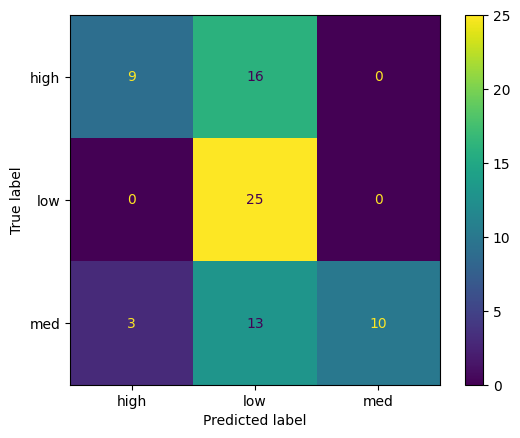

In [17]:


conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2]))

cm_display.plot()
plt.show()

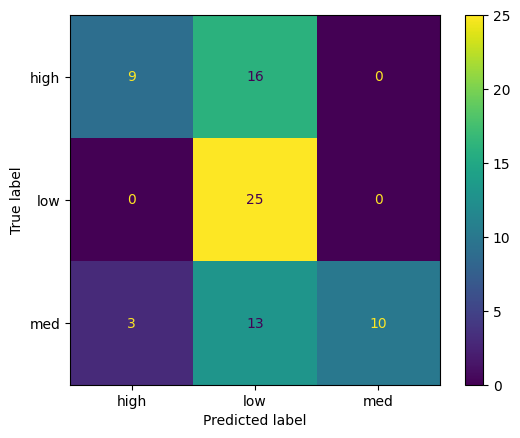

In [18]:
conf_mat=confusion_matrix(lb.inverse_transform(y_test_flat_category), lb.inverse_transform(flat_category), labels=lb.inverse_transform([0,1,2]))
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = lb.inverse_transform([0,1,2]))

cm_display.plot()
plt.show()

In [19]:
# Step 4: Print Classification Report
print("\nClassification Report:")

# Convert class labels to strings
target_names = lb.classes_.astype(str)  # Ensure class names are strings

print(classification_report(y_test_labels, y_pred_labels, target_names=target_names))



Classification Report:


NameError: name 'y_test_labels' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Step 1: Model Prediction
y_pred = model.predict(x_testcnn)

# Convert predictions and ground truth from one-hot to class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_test_classes = np.argmax(y_test, axis=1)  # True class indices

# Step 2: Inverse Transform to Get Original Class Names
lb = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Data-preparation2/test3/lb.sav", 'rb'))  # Load the label encoder used earlier
y_pred_labels = lb.inverse_transform(y_pred_classes)
y_test_labels = lb.inverse_transform(y_test_classes)

# Step 3: Generate and Display Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=lb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)

# Plot the confusion matrix
disp.plot(cmap="Blues")
print("\nConfusion Matrix:")
print(cm)

# Step 4: Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names = lb.classes_.astype(str)))


In [ ]:
y_pred.argmax